In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
os.listdir(os.path.abspath('/Users/Roman/Desktop/CREM/SWISS ENERGY DATA'))

['Nbre bâtiment par agent énergétique.xlsx',
 'production_énergie',
 '.DS_Store',
 'Subventions PR par canton et par an.xlsx',
 'energy_production_v1',
 'Données nbre bâtiments par agents énergétiques',
 'global_dataframe',
 'National demographic data',
 'final_energy_consumption_v1',
 'energy_importation_v2',
 'Project data set',
 'utilization_rate_nuclear_centrals_v1.xls']

In [25]:
df=pd.read_csv(os.path.abspath('/Users/Roman/Desktop/CREM/SWISS ENERGY DATA/Project data set'))
df.drop(df.columns[[0]],axis=1,inplace=True)
df

,Année,Degré.jour,Total (TJ),Combustibles pétroliers (TJ),Carburants (TJ),Électricité (TJ),Gaz (TJ),Charbon (TJ),Bois (TJ),CAD (TJ),...,Population résidente (en milliers),Étrangers (en milliers),USD par baril,Production - Centrales hydrauliques (TJ),Production - Centrales nucléaires (TJ),Production - Centrales thermiques (TJ),Production - Énergies Renouvelables (TJ),Production brute (TJ),Production - Pompage accumulation (TJ),Production nette (TJ)
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4717.000,285.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5360.000,514.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6193.000,1001.900,NaN,112582.8,6660.0,6346.8,0.0,125589.6,3474.0,122115.6
3,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,99226.8,6634.8,7851.6,0.0,113713.2,4957.2,108756.0
4,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,90997.2,16740.0,8535.6,0.0,116272.8,5918.4,110354.4
5,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,103770.0,21225.6,8762.4,0.0,133758.0,6206.4,127551.6
6,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,102826.8,24228.0,7621.2,0.0,134676.0,5547.6,129128.4
7,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,122306.4,26607.6,5864.4,0.0,154778.4,4312.8,150465.6
8,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,95839.2,27219.6,7408.8,0.0,130467.6,4838.4,125629.2
9,1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,130644.0,27820.8,6786.0,0.0,165250.8,4597.2,160653.6


<IPython.core.display.Javascript object>


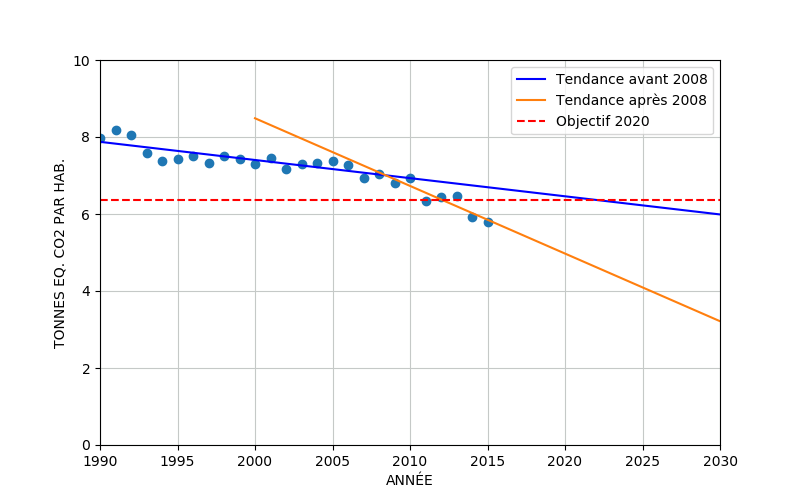

In [30]:
df_CO2=df.loc[:,['Année','Émissions globales CO2','Population résidente (en milliers)']]
df_CO2.dropna(inplace=True)
%matplotlib notebook
plt.figure('Évolution globale CO2',figsize=(8,5))
plt.plot(df_CO2['Année'],1000*df_CO2['Émissions globales CO2']/df_CO2['Population résidente (en milliers)'],'o')

df_CO2_1990=df_CO2[df_CO2['Année']<2008]
fitCO2g=np.polyfit(df_CO2_1990['Année'],1000*df_CO2_1990['Émissions globales CO2']/df_CO2_1990['Population résidente (en milliers)'],1)
reg1=np.poly1d(fitCO2g)
x1=range(1990,2031)
y1=reg1(x1)
plt.plot(x1,y1,'b',label="Tendance avant 2008")                 # Régression linéaire avant 2008

df_CO2_2008=df_CO2[df_CO2['Année']>2008]
fitCO2_2008=np.polyfit(df_CO2_2008['Année'],1000*df_CO2_2008['Émissions globales CO2']/df_CO2_2008['Population résidente (en milliers)'],1)
reg2=np.poly1d(fitCO2_2008)
x2=range(2000,2031)
y2=reg2(x2)
plt.plot(x2,y2,label="Tendance après 2008")                 # Régression linéaire depuis taxe CO2 de 2008

y3=[0]*41
for a in range (0,41):
    y3[a]=1000*53.755302*0.8/df.loc[22,'Population résidente (en milliers)']
i=0
x3=[0]*41
for b in range (1990,2031):
    x3[i]=b
    i+=1
    
plt.plot(x3,y3,'--',color="red",label="Objectif 2020")            # Objectif 2020 (80% du niveau 1990)
plt.grid(color='xkcd:silver')
plt.axis([1990,2030,0,10])
plt.xlabel('ANNÉE')
plt.ylabel('TONNES EQ. CO2 PAR HAB.')
plt.legend()

<IPython.core.display.Javascript object>


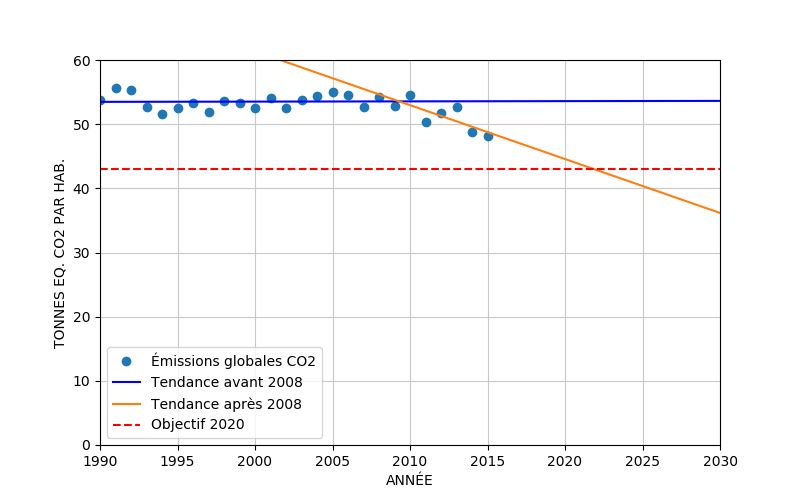

In [34]:
df_CO2=df.loc[:,['Année','Émissions globales CO2','Population résidente (en milliers)']]
df_CO2.dropna(inplace=True)
%matplotlib notebook
plt.figure('Évolution globale CO2',figsize=(8,5))
plt.plot(df_CO2['Année'],df_CO2['Émissions globales CO2'],'o')

df_CO2_1990=df_CO2[df_CO2['Année']<2008]
fitCO2g=np.polyfit(df_CO2_1990['Année'],df_CO2_1990['Émissions globales CO2'],1)
reg1=np.poly1d(fitCO2g)
x1=range(1990,2031)
y1=reg1(x1)
plt.plot(x1,y1,'b',label="Tendance avant 2008")                 # Régression linéaire avant 2008

df_CO2_2008=df_CO2[df_CO2['Année']>2008]
fitCO2_2008=np.polyfit(df_CO2_2008['Année'],df_CO2_2008['Émissions globales CO2'],1)
reg2=np.poly1d(fitCO2_2008)
x2=range(2000,2031)
y2=reg2(x2)
plt.plot(x2,y2,label="Tendance après 2008")                 # Régression linéaire depuis taxe CO2 de 2008

y3=[0]*41
for a in range (0,41):
    y3[a]=53.755302*0.8
i=0
x3=[0]*41
for b in range (1990,2031):
    x3[i]=b
    i+=1
    
plt.plot(x3,y3,'--',color="red",label="Objectif 2020")            # Objectif 2020 (80% du niveau 1990)
plt.grid(color='xkcd:silver')
plt.axis([1990,2030,0,60])
plt.xlabel('ANNÉE')
plt.ylabel('TONNES EQ. CO2 PAR HAB.')
plt.legend()

<IPython.core.display.Javascript object>


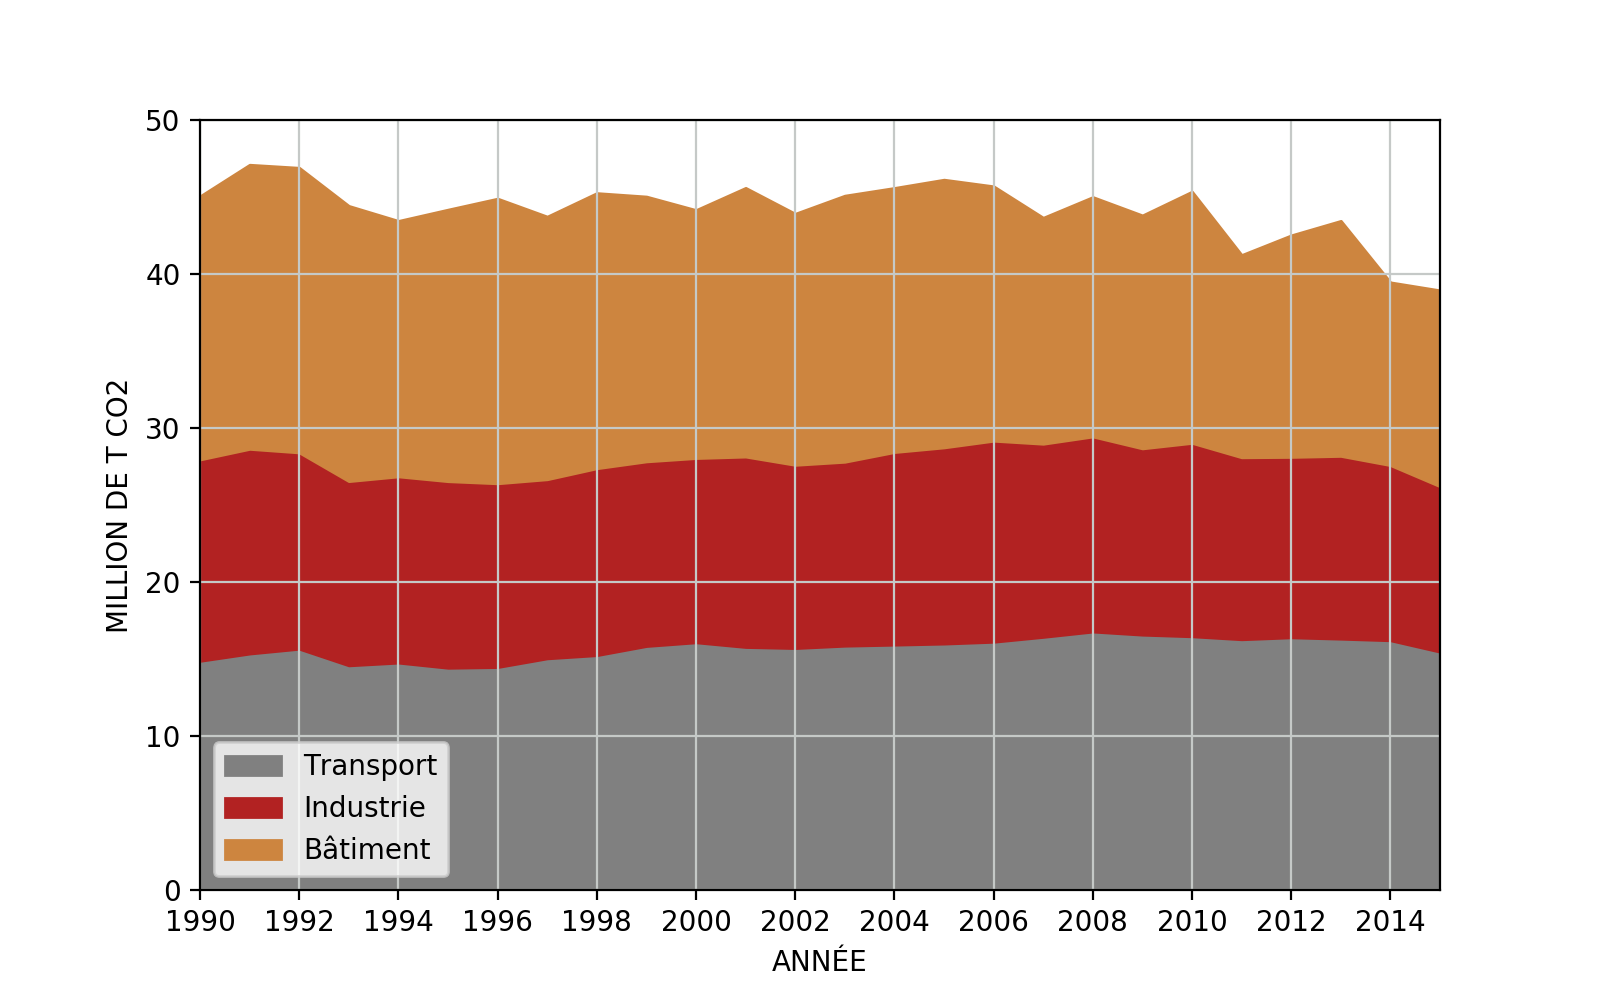

In [5]:
plt.figure('Évolution des émissions de CO2 par poste de consommation',figsize=(8,5))
plt.fill_between(df['Année'],0,df['Émissions CO2 transport (en millions de T équivalents)'],label='Transport',color='gray')
plt.fill_between(df['Année'],df['Émissions CO2 transport (en millions de T équivalents)'],df['Émissions CO2 transport (en millions de T équivalents)']+df['Émissions CO2 industrie (en millions de T équivalents)'],label='Industrie',color='firebrick')
plt.fill_between(df['Année'],df['Émissions CO2 transport (en millions de T équivalents)']+df['Émissions CO2 industrie (en millions de T équivalents)'],df['Émissions CO2 transport (en millions de T équivalents)']+df['Émissions CO2 industrie (en millions de T équivalents)']+df['Émissions CO2 bâtiment (en millions de T équivalents)'],label='Bâtiment',color='peru')

plt.legend(loc=3)
plt.grid(color='xkcd:silver')
plt.xticks(np.arange(1990, 2016, step=2))
plt.axis([1990,2015,0,50])
plt.xlabel('ANNÉE')
plt.ylabel('MILLION DE T CO2')

<IPython.core.display.Javascript object>


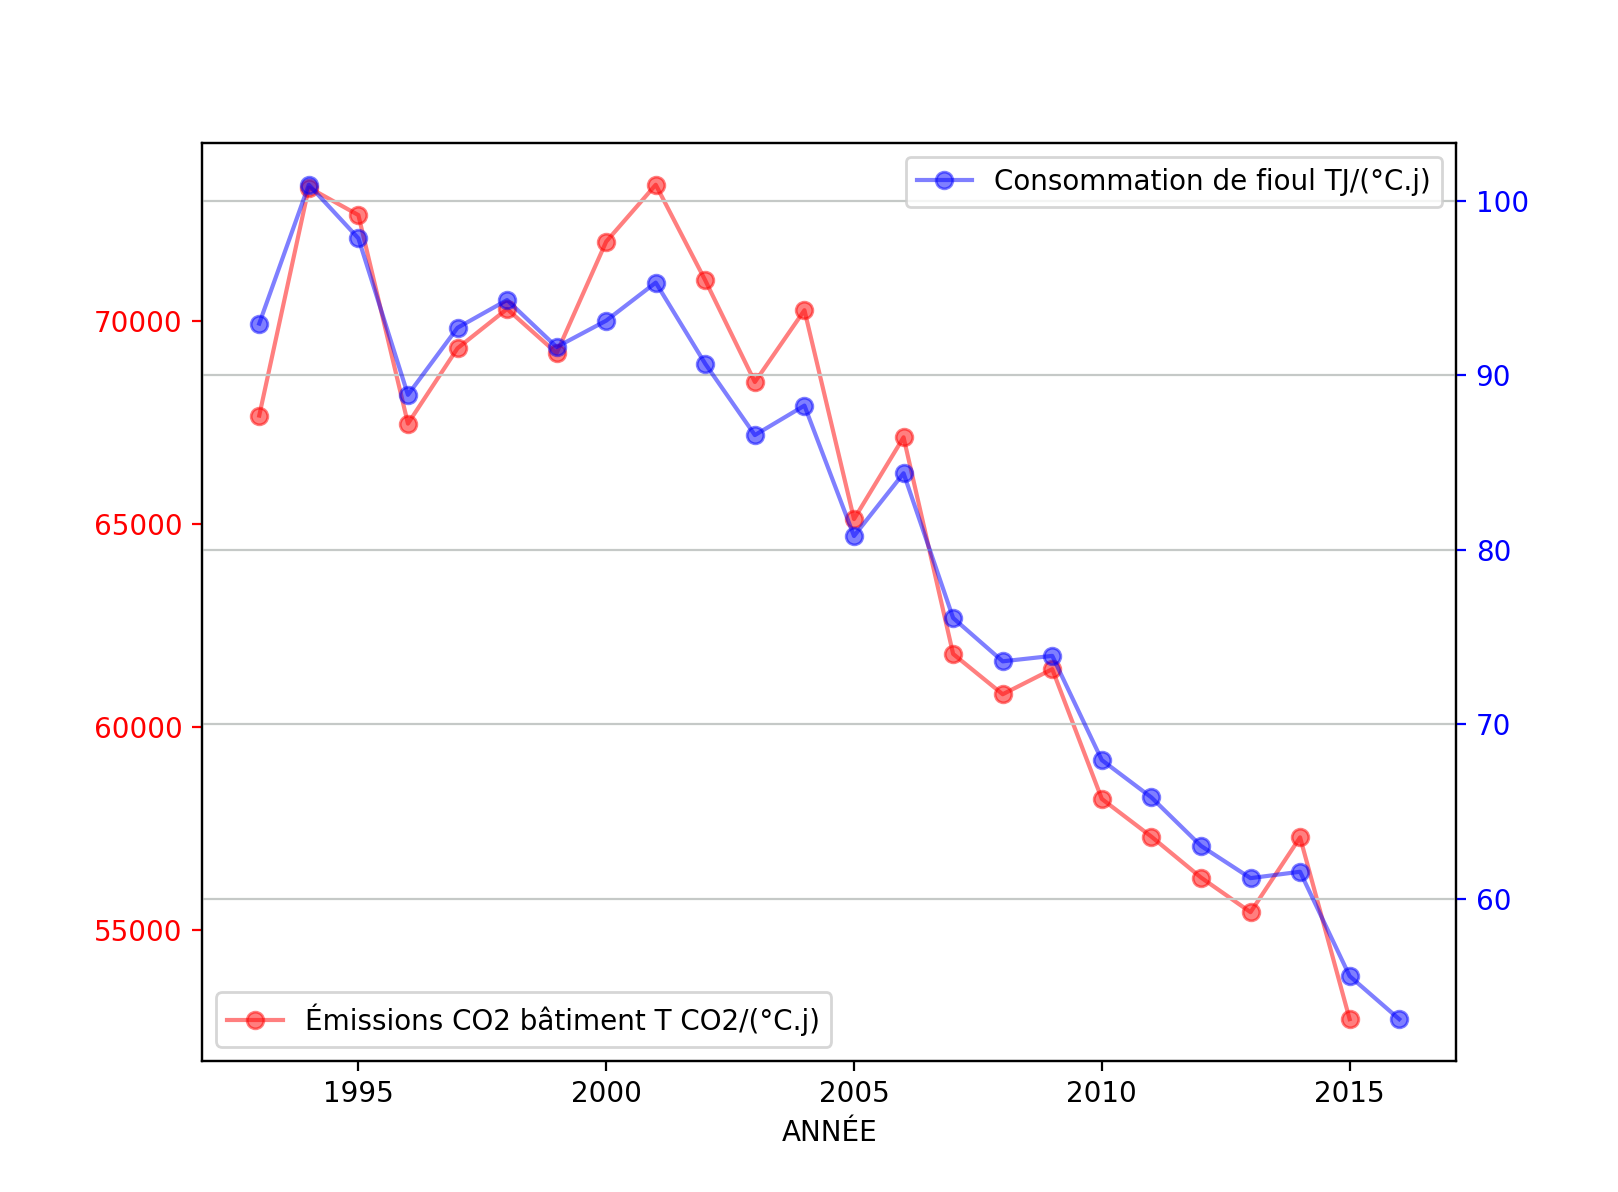

In [37]:
fig, ax1=plt.subplots()

ax1.plot(df['Année'],10e6*df['Émissions CO2 bâtiment (en millions de T équivalents)']/df['Degré.jour'],'-o',color='r',label='Émissions CO2 bâtiment T CO2/(°C.j)',alpha=0.5)
ax1.tick_params(axis='y',colors='red')
plt.xlabel('ANNÉE')
ax2=ax1.twinx()
ax2.plot(df['Année'],df['Combustibles pétroliers (TJ)']/df['Degré.jour'],'-o',color='b',label='Consommation de fioul TJ/(°C.j)',alpha=0.5)
ax2.tick_params(axis='y',colors='blue')

plt.grid(color='xkcd:silver')
ax1.legend(loc=3)
ax2.legend()


#il y a clairement corrélation entre la consommation de fioul des bâtiments suisses et les émissions de CO2 de ce secteur.

<IPython.core.display.Javascript object>


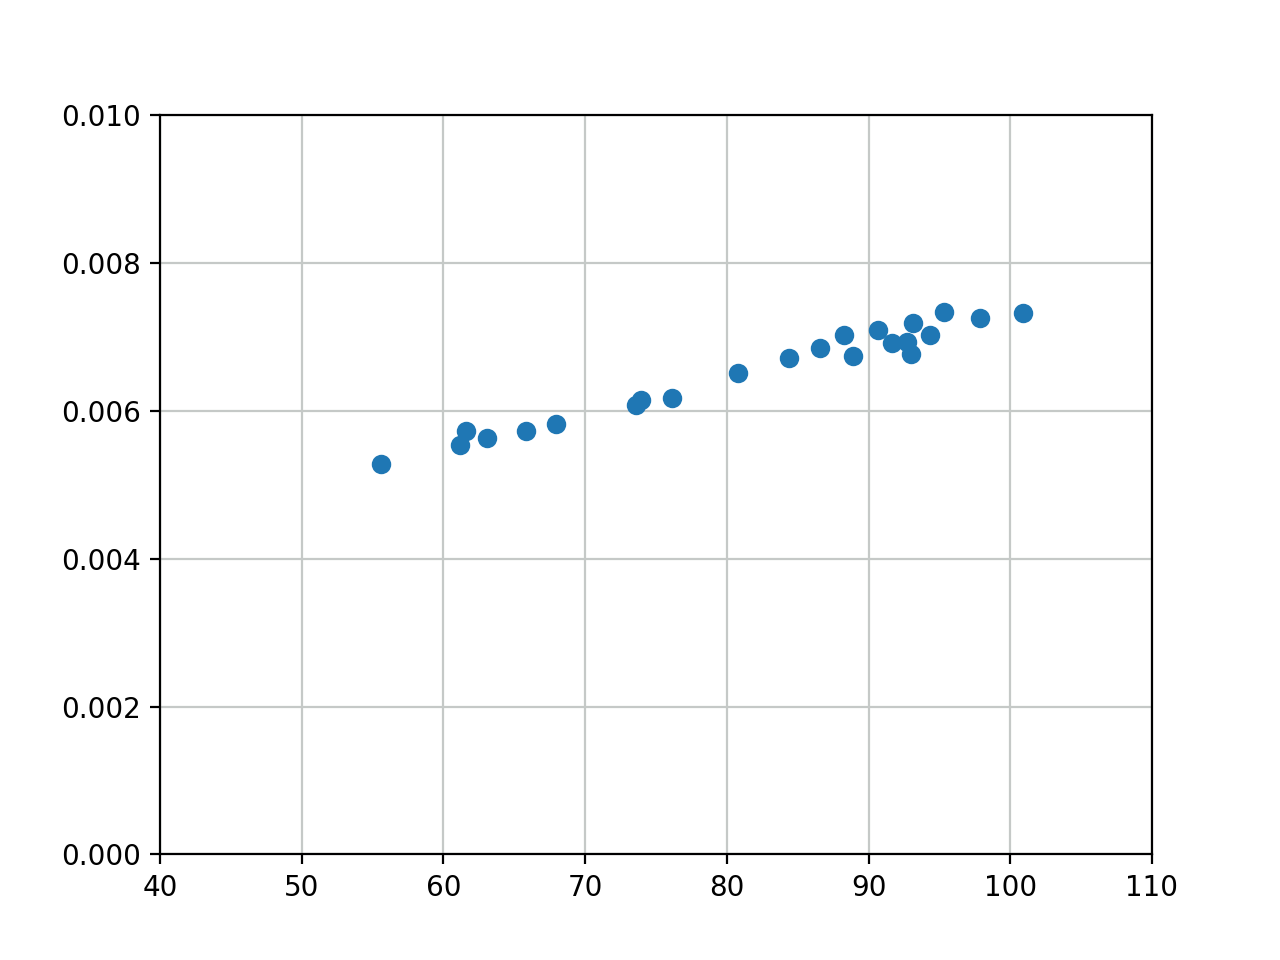

In [7]:
dX=df.loc[:,["Degré.jour","Combustibles pétroliers (TJ)","Émissions CO2 bâtiment (en millions de T équivalents)"]]
dX.dropna(inplace=True)
X1=dX["Combustibles pétroliers (TJ)"]
Y1=dX["Émissions CO2 bâtiment (en millions de T équivalents)"]
plt.figure('Étude de corrélation fioul/CO2 bâtiment')
plt.plot(X1/dX['Degré.jour'],Y1/dX['Degré.jour'],'o')
plt.axis([40,110,0,0.01])
plt.grid(color='xkcd:silver')
#liaison linéaire positive entre ces deux variables

In [48]:
# Calcul du coefficient de Pearson

from scipy import stats as stat
stat.pearsonr(X1,Y1)


(0.97033084188111762, 1.9927051498660505e-14)

<IPython.core.display.Javascript object>


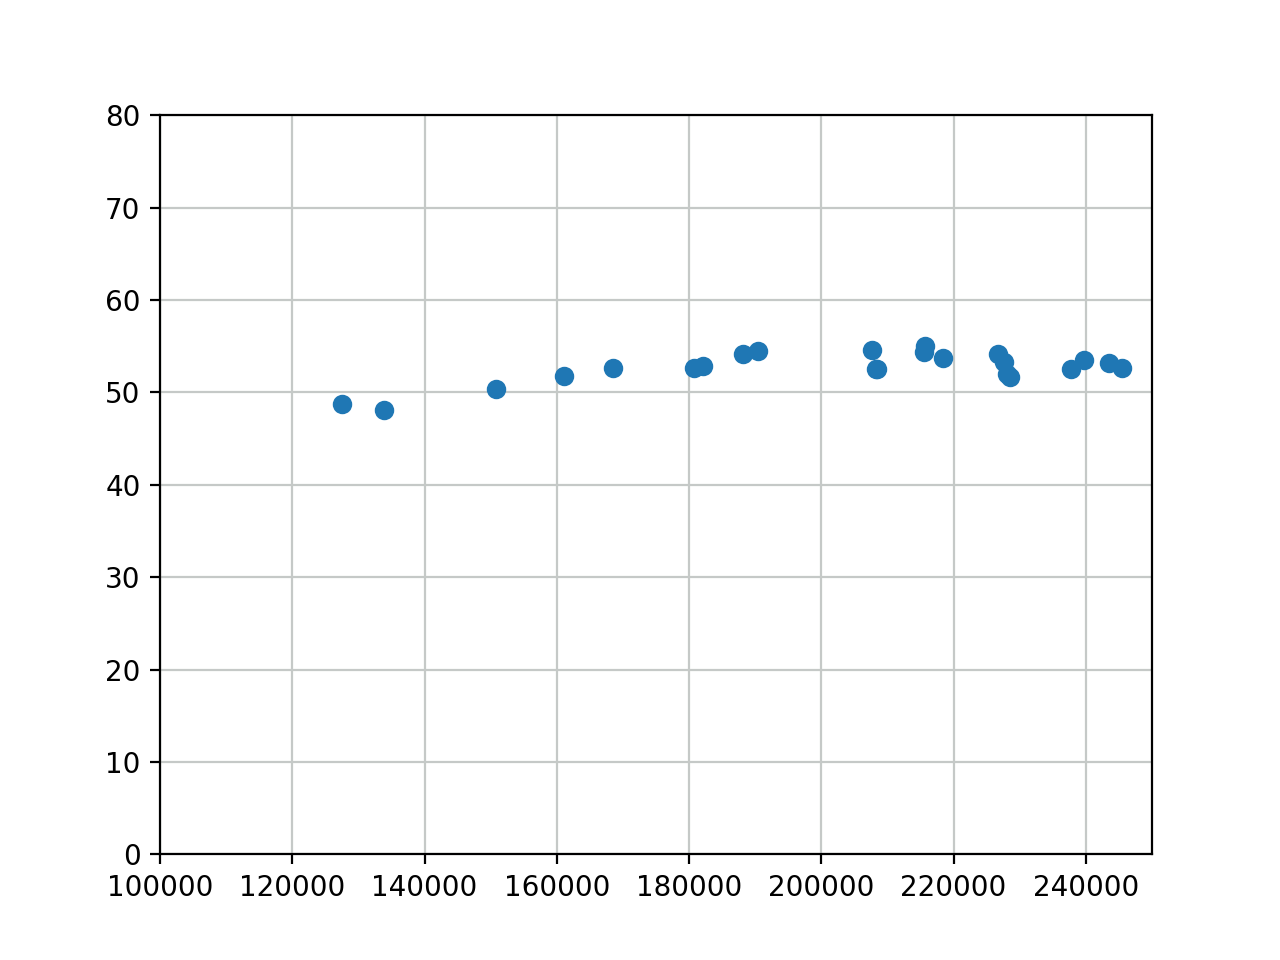

In [9]:
dX2=df.loc[:,["Combustibles pétroliers (TJ)",'Émissions globales CO2']]
dX2.dropna(inplace=True)
Y2=dX2['Émissions globales CO2']
plt.figure('Corrélation fioul/CO2 global')
plt.plot(X1,Y2,'o')
plt.axis([100000,250000,0,80])
plt.grid(color='xkcd:silver')

In [53]:
stat.pearsonr(X1,Y2)


(0.64367422858967427, 0.00091994769674569798)

<IPython.core.display.Javascript object>


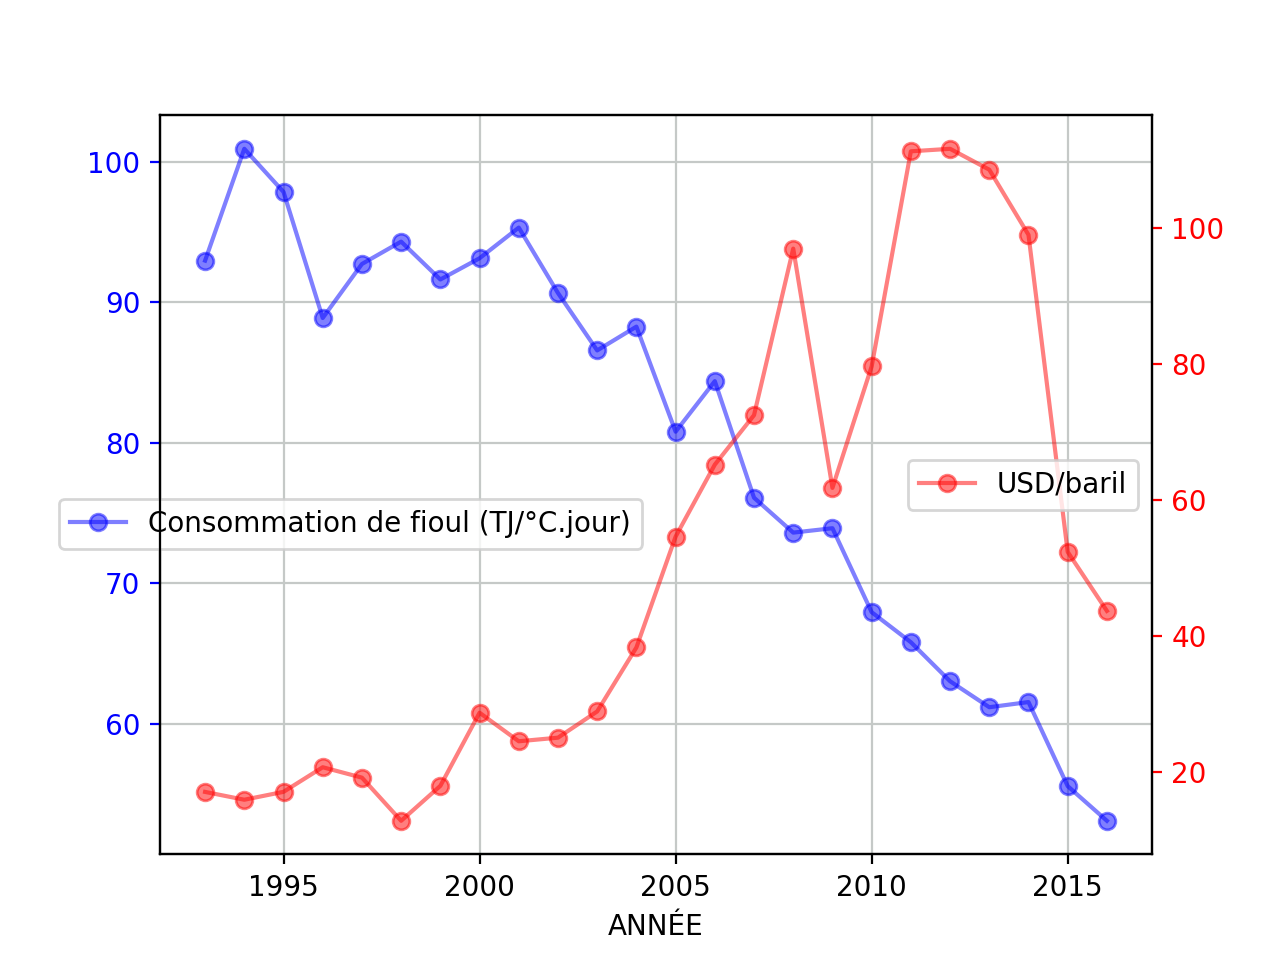

<IPython.core.display.Javascript object>


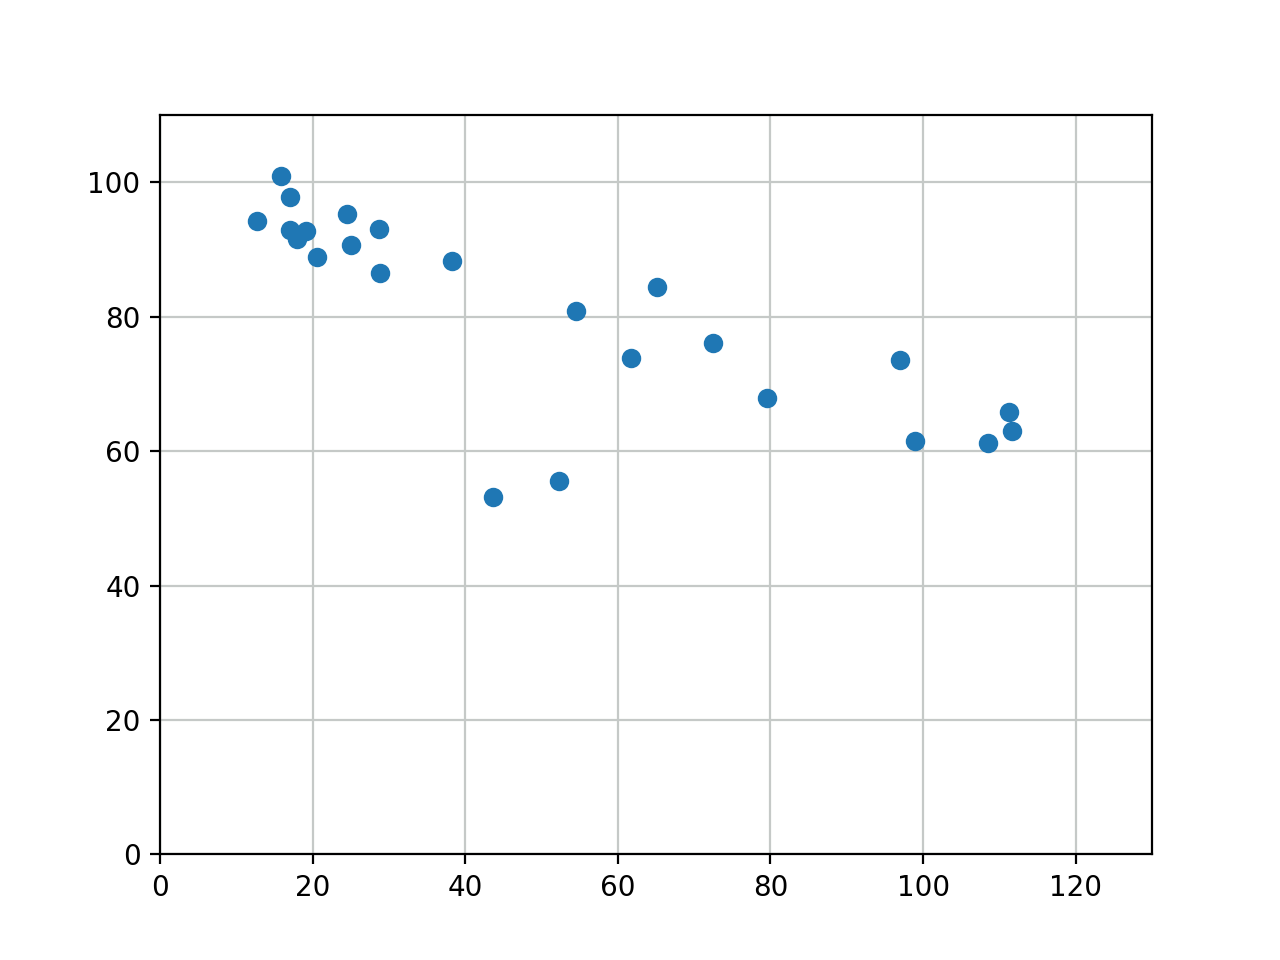

In [87]:
dX3=df.loc[:,["Année","Combustibles pétroliers (TJ)",'USD par baril','Degré.jour']]
dX3.dropna(inplace=True)

#   Corrélation consommation de fioul avec l'inverse du prix du baril

fig, ax1=plt.subplots()

X3=dX3['USD par baril']
Y3=dX3["Combustibles pétroliers (TJ)"]/dX3['Degré.jour']

ax1.plot(dX3['Année'],dX3["Combustibles pétroliers (TJ)"]/dX3['Degré.jour'],'-o',color='blue',alpha=0.5,label='Consommation de fioul (TJ/°C.jour)')
ax1.tick_params(axis='y',colors='blue')
plt.legend(bbox_to_anchor=[0.5,0.5],loc='best')
plt.xlabel('ANNÉE')

plt.grid(color='xkcd:silver')

ax2=ax1.twinx()
ax2.plot(dX3['Année'],dX3['USD par baril'],'-o',alpha=0.5,color='red',label='USD/baril')
ax2.tick_params(axis='y',colors='red')
plt.legend(loc=7)

plt.figure('Corrélation')

plt.plot(X3,Y3,'o')
plt.axis([0,130,0,110])
plt.grid(color='xkcd:silver')

In [68]:
stat.pearsonr(X3,Y3)

(-0.78121906291762211, 6.6083503721447021e-06)